In [68]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
pd.set_option('display.max_columns', None)
import analysis as  an  
sns.set()





from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor


from sklearn import set_config




## Data cleaning and processing 

In [2]:
cols = {
    'Cell':'cell_phone',
    
    'main':'electricity',
    'exp':'expenditure',
    'roofc':'roof_condition'


}

response_dict_1 = {
    1:'Yes',
    2:"No",
    9:'Unspecified'
}
yes_no_dict = {
    1: "Yes",
    2: "No",
    9: "Unspecified"
}
male = {1: 'Male', 2: 'Female'}

ethnicity_dict = {
    1: "African/Black",
    2: "Coloured",
    3: "Indian/Asian",
    4: "White"
}
geo_type_data = {
    1: "Urban formal",
    2: "Urban informal",
    3: "Tribal areas",
    4: "Rural formal",
    5: "Other"
}
province = {
    1: "Western Cape",
    2: "Eastern Cape",
    3: "Northern Cape",
    4: "Free State",
    5: "KwaZulu-Natal",
    6: "North West",
    7: "Gauteng",
    8: "Mpumalanga",
    9: "Limpopo"
}


material_dict = {
    1: "Bricks",
    2: "Cement block/concrete",
    3: "Corrugated iron/zinc",
    4: "Wood",
    5: "Plastic",
    6: "Cardboard",
    7: "Mud and cement mix",
    8: "Wattle and daub",
    9: "Tile",
    10: "Mud",
    11: "Thatching/grass",
    12: "Asbestos",
    13: "Other",
    99: "Unspecified"
}
income_dict = {
    1: 'R0',
    2: 'R1-R199',
    3: 'R200-R399',
    4: 'R400-R799',
    5: 'R800-R1 199',
    6: 'R1 200-R1 799',
    7: 'R1 800-R2 499',
    8: 'R2 500-R4 999',
    9: 'R5 000-R9 999',
    10: 'R10 000 or more',
    11: 'Do not know',
    12: 'Refuse',
    99: 'Unspecified'
}

In [3]:
my_columns = list(cols.values())
other = ['uqnr', 'head_age', 'house_wgt', 'prov', 'geotype', 'head_popgrp', 'head_sex','year']
column_list = my_columns + other
column_list
 

['cell_phone',
 'electricity',
 'expenditure',
 'roof_condition',
 'uqnr',
 'head_age',
 'house_wgt',
 'prov',
 'geotype',
 'head_popgrp',
 'head_sex',
 'year']

#### pulling ddata 

In [4]:
clean_df = pd.DataFrame()
clean_df_list = []
for i in range(2002,2018):
    print(i)
    df =  pd.read_csv(f"data_room/{i}.csv", encoding='latin1')
    # making then lowe case 
    for name in df.columns:
        lower = name.lower()
        df = df.rename(columns={name:lower})
        
        for match_column,new_column in cols.items():
            for col  in df.columns:
                if  col.endswith(match_column):

                        df = df.rename(columns={col:new_column})
                if 'mains' in col:
                     df = df.rename(columns={col:'electricity'})
                if 'expe' in col:
                     df = df.rename(columns={col:'expenditure'})
                if 'tota' in col:
                     df = df.rename(columns={col:'expenditure'})
                if 'cell' in col:
                     df = df.rename(columns={col:'cell_phone'})
                     
         
    provin = df['prov'].unique()
    province = provin[0]
    df['year'] = i
    df = df.loc[:, ~df.columns.duplicated()]



  
    df = df[column_list]

   
    
    clean_df_list.append(df)
clean_df = pd.concat(clean_df_list)



2002


/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_30923/4039264923.py:5: DtypeWarning: Columns (112) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv(f"data_room/{i}.csv", encoding='latin1')


2003


/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_30923/4039264923.py:5: DtypeWarning: Columns (40,151) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv(f"data_room/{i}.csv", encoding='latin1')


2004
2005
2006
2007


/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_30923/4039264923.py:5: DtypeWarning: Columns (168,169) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv(f"data_room/{i}.csv", encoding='latin1')


2008
2009


/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_30923/4039264923.py:5: DtypeWarning: Columns (193,198) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv(f"data_room/{i}.csv", encoding='latin1')


2010


/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_30923/4039264923.py:5: DtypeWarning: Columns (112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv(f"data_room/{i}.csv", encoding='latin1')


2011


/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_30923/4039264923.py:5: DtypeWarning: Columns (96,99,102,176,185) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv(f"data_room/{i}.csv", encoding='latin1')


2012


/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_30923/4039264923.py:5: DtypeWarning: Columns (146,149,152,251,257,258,259,260) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv(f"data_room/{i}.csv", encoding='latin1')


2013


/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_30923/4039264923.py:5: DtypeWarning: Columns (129,132,135,247,252,253,254,255) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv(f"data_room/{i}.csv", encoding='latin1')


2014
2015
2016
2017


In [5]:
clean_df['cell_phone'] =  clean_df['cell_phone'].replace({ 1: "Yes",
    2: "No",
    9: "Unspecified"})
clean_df['roof_condition'] =  clean_df['roof_condition'].replace({   1: "Bricks",
    2: "Cement block/concrete",
    3: "Corrugated iron/zinc",
    4: "Wood",
    5: "Plastic",
    6: "Cardboard",
    7: "Mud and cement mix",
    8: "Wattle and daub",
    9: "Tile",
    10: "Mud",
    11: "Thatching/grass",
    12: "Asbestos",
    13: "Other",
    99: "Unspecified"})
clean_df['head_sex'] =  clean_df['head_sex'].replace({1: 'Male', 2: 'Female'})

clean_df['prov'] =  clean_df['prov'].replace({
    1: "Western Cape",
    2: "Eastern Cape",
    3: "Northern Cape",
    4: "Free State",
    5: "KwaZulu-Natal",
    6: "North West",
    7: "Gauteng",
    8: "Mpumalanga",
    9: "Limpopo"
})
clean_df['electricity'] =  clean_df['electricity'].replace({  1: "Yes",
    2: "No",
    9: "Unspecified"})
clean_df['geotype'] =  clean_df['geotype'].replace({   1: "Urban formal",
    2: "Urban informal",
    3: "Tribal areas",
    4: "Rural formal",
    5: "Other"})
clean_df['head_popgrp'] =  clean_df['head_popgrp'].replace({  1: "African/Black",
    2: "Coloured",
    3: "Indian/Asian",
    4: "White"})

clean_df['expenditure'] =  clean_df['expenditure'].replace({ 1: 'R0',
    2: 'R1-R199',
    3: 'R200-R399',
    4: 'R400-R799',
    5: 'R800-R1 199',
    6: 'R1 200-R1 799',
    7: 'R1 800-R2 499',
    8: 'R2 500-R4 999',
    9: 'R5 000-R9 999',
    10: 'R10 000 or more',
    11: 'Do not know',
    12: 'Refuse',
    99: 'Unspecified'})






In [6]:
# clean_df.to_csv('clean_data.csv', index=False)
df = pd.read_csv("clean_data.csv")
df.head()

,cell_phone,electricity,expenditure,roof_condition,uqnr,head_age,house_wgt,prov,geotype,head_popgrp,head_sex,year
0,No,Yes,R 2 500 - R 4 999,Good,1011001002201,46,472.456808,Western Cape,Urban formal,White,Female,2002
1,Yes,Yes,R 2 500 - R 4 999,Needs minor repairs,1011001004901,38,380.486853,Western Cape,Urban formal,White,Male,2002
2,No,Yes,R 400 - R 799,Good,1011001007501,38,471.388601,Western Cape,Urban formal,Coloured,Female,2002
3,No,Yes,R 400 - R 799,Good,1011001007502,36,471.388601,Western Cape,Urban formal,Coloured,Female,2002
4,Yes,Yes,R 400 - R 799,Good,1011001010101,56,377.697623,Western Cape,Urban formal,White,Female,2002


In [7]:
eef =  pd.read_csv(f"data_room/2010.csv", encoding='latin1')

/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_30923/172422632.py:1: DtypeWarning: Columns (112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  eef =  pd.read_csv(f"data_room/2010.csv", encoding='latin1')


### Calculatin expenditure mean 

In [8]:

mean_salary = []

for i in df['expenditure']:

    i = i.replace('R', '')
    k = i.replace(" ","")
    if "-" in k:
        k = k.split("-")

        try:

            mean_salary.append((int(k[0])+int(k[1]))/2)
        except:
            mean_salary.append(7499.5)

    elif ' ' in k:
        mk = k.split(' ')
        mean_salary.append((int(k[0])+int(k[1]))/2)
    elif '10 000' in i:
        mean_salary.append(10000)
    else:
        mean_salary.append(200)
df['mean_expenditure'] =  mean_salary

### fixing the issues of 2010 salary 

In [9]:

mean_salary = []
for i in eef['Q417Exp']:

    
    i = i.replace('R', '')
    k = i.replace(" ","")
    if "-" in k:
        k = k.split("-")

        try:

            mean_salary.append((int(k[0])+int(k[1]))/2)
        except:
            mean_salary.append(7499.5)

    elif ' ' in k:
        mk = k.split(' ')
        mean_salary.append((int(k[0])+int(k[1]))/2)
    elif '10 000' in i:
        mean_salary.append(10000)
    else:
        mean_salary.append(200)
eef['mean_expenditure'] =  mean_salary

In [10]:
values_to_assign = eef['mean_expenditure'].values
filtered_df = df[df['year'] == 2010]
repeated_values = values_to_assign[:len(filtered_df)]
df.loc[df['year'] == 2010, 'mean_expenditure'] = repeated_values

In [11]:
df.loc[df['year'] == 2010, 'mean_expenditure']

213752    3749.5
213753    2149.5
213754    1499.5
213755    1499.5
213756     999.5
           ...  
239266     999.5
239267     599.5
239268     999.5
239269    2149.5
239270    2149.5
Name: mean_expenditure, Length: 25519, dtype: float64

now for 2009

In [12]:
dfv =  pd.read_csv(f"data_room/2009.csv", encoding='latin1')

mean_salary_2009 = []
for i in dfv['Q420Exp']:

    
    i = i.replace('R', '')
    k = i.replace(" ","")
    if "-" in k:
        k = k.split("-")

        try:

            mean_salary_2009.append((int(k[0])+int(k[1]))/2)
        except:
            mean_salary_2009.append(7499.5)

    elif ' ' in k:
        mk = k.split(' ')
        mean_salary_2009.append((int(k[0])+int(k[1]))/2)
    elif '10 000' in i:
        mean_salary_2009.append(10000)
    else:
        mean_salary_2009.append(200)
dfv['mean_expenditure'] =  mean_salary_2009


values_to_assign_2009 = dfv['mean_expenditure'].values
filtered_df_2009 = df[df['year'] == 2009]
repeated_values = values_to_assign_2009[:len(filtered_df_2009)]
df.loc[df['year'] == 2009, 'mean_expenditure'] = repeated_values
df.loc[df['year'] == 2009, 'mean_expenditure']

/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_30923/3185389393.py:1: DtypeWarning: Columns (193,198) have mixed types. Specify dtype option on import or set low_memory=False.
  dfv =  pd.read_csv(f"data_room/2009.csv", encoding='latin1')


188449    10000.0
188450     1499.5
188451      999.5
188452     1499.5
188453     3749.5
           ...   
213747      599.5
213748      599.5
213749     1499.5
213750      599.5
213751      599.5
Name: mean_expenditure, Length: 25303, dtype: float64

---

## Data exploration 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404880 entries, 0 to 404879
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cell_phone        404880 non-null  object 
 1   electricity       404880 non-null  object 
 2   expenditure       404880 non-null  object 
 3   roof_condition    404880 non-null  object 
 4   uqnr              404880 non-null  int64  
 5   head_age          404880 non-null  int64  
 6   house_wgt         404880 non-null  float64
 7   prov              404880 non-null  object 
 8   geotype           404880 non-null  object 
 9   head_popgrp       404880 non-null  object 
 10  head_sex          404880 non-null  object 
 11  year              404880 non-null  int64  
 12  mean_expenditure  404880 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 40.2+ MB


In [14]:
df.head()

,cell_phone,electricity,expenditure,roof_condition,uqnr,head_age,house_wgt,prov,geotype,head_popgrp,head_sex,year,mean_expenditure
0,No,Yes,R 2 500 - R 4 999,Good,1011001002201,46,472.456808,Western Cape,Urban formal,White,Female,2002,3749.5
1,Yes,Yes,R 2 500 - R 4 999,Needs minor repairs,1011001004901,38,380.486853,Western Cape,Urban formal,White,Male,2002,3749.5
2,No,Yes,R 400 - R 799,Good,1011001007501,38,471.388601,Western Cape,Urban formal,Coloured,Female,2002,599.5
3,No,Yes,R 400 - R 799,Good,1011001007502,36,471.388601,Western Cape,Urban formal,Coloured,Female,2002,599.5
4,Yes,Yes,R 400 - R 799,Good,1011001010101,56,377.697623,Western Cape,Urban formal,White,Female,2002,599.5


In [15]:
df[['head_age','mean_expenditure']].describe()

,head_age,mean_expenditure
count,404880.000000,404880.000000
mean,48.021345,2531.900890
std,15.960559,2946.765596
min,0.000000,100.000000
25%,36.000000,599.500000
50%,47.000000,999.500000
75%,59.000000,3749.500000
max,130.000000,10000.000000


In [16]:
df_phones = df[df['cell_phone'] == 'Yes']

/Users/phulusoravhuhali/Desktop/assigment_capsnap/venv/lib/python3.9/site-packages/seaborn/distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


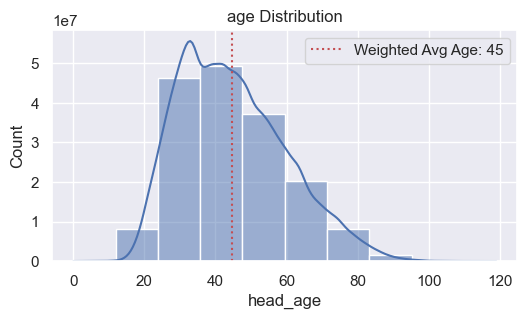

In [17]:

an.plot_age_distribution(df_phones,'head_age','house_wgt','age')

## The mean age of people with phones is 45

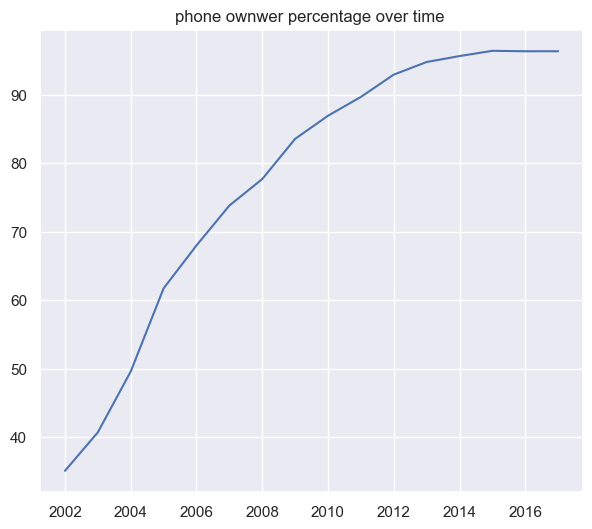

In [54]:
df_yy = an.phone_calculate_weighted_percentage(
    df, 
    year_range=range(2002, 2018), 
    column='cell_phone', 
    weights_col='house_wgt'  
)

df_yy =  df_yy[df_yy['cell_phone'] == 'Yes']
fig ,ax =  plt.subplots(figsize = (7,6))
ax.plot(df_yy['year'],df_yy['percentage'])
ax.set_title('phone ownwer percentage over time ');


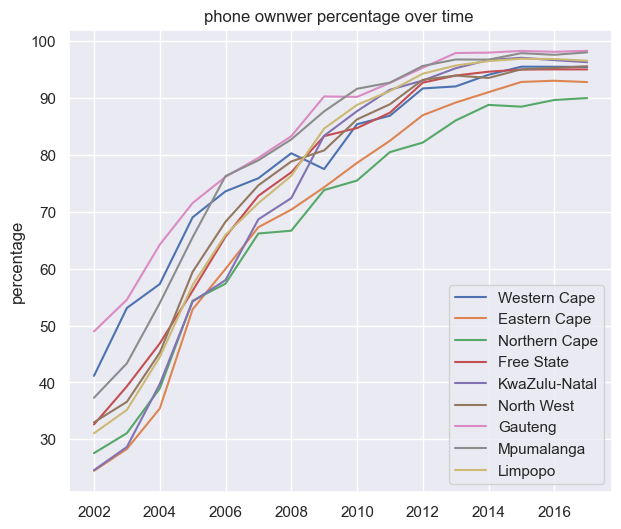

In [52]:
provinces = df['prov'].unique()
fig ,ax =  plt.subplots(figsize = (7,6))
for province in provinces:
    df_pp = df[df['prov'] == province]
    df_plt = an.phone_calculate_weighted_percentage(
    df_pp, 
    year_range=range(2002, 2018), 
    column='cell_phone', 
    weights_col='house_wgt')
    df_plt =  df_plt[df_plt['cell_phone'] == 'Yes']
    ax.plot(df_plt['year'],df_plt['percentage'],label = province)
ax.set_title('phone ownwer percentage over time ');
ax.set_ylabel("percentage")
ax.legend();

    



In [53]:

for i in range(2002, 2018): 
    
    df_y = df[df['year'] == i]    
    print(an.percentage_phone(df_y,'cell_phone',i))

1    32.885804
Name: percentage, dtype: float64  %  in 2002  has cell phones
1    38.587843
Name: percentage, dtype: float64  %  in 2003  has cell phones
1    46.9874
Name: percentage, dtype: float64  %  in 2004  has cell phones
0    55.985339
Name: percentage, dtype: float64  %  in 2005  has cell phones
0    61.766492
Name: percentage, dtype: float64  %  in 2006  has cell phones
0    68.70981
Name: percentage, dtype: float64  %  in 2007  has cell phones
0    76.036658
Name: percentage, dtype: float64  %  in 2008  has cell phones
0    82.369679
Name: percentage, dtype: float64  %  in 2009  has cell phones
0    85.606803
Name: percentage, dtype: float64  %  in 2010  has cell phones
0    88.595232
Name: percentage, dtype: float64  %  in 2011  has cell phones
0    92.048954
Name: percentage, dtype: float64  %  in 2012  has cell phones
0    93.872644
Name: percentage, dtype: float64  %  in 2013  has cell phones
0    94.791626
Name: percentage, dtype: float64  %  in 2014  has cell phones
0 

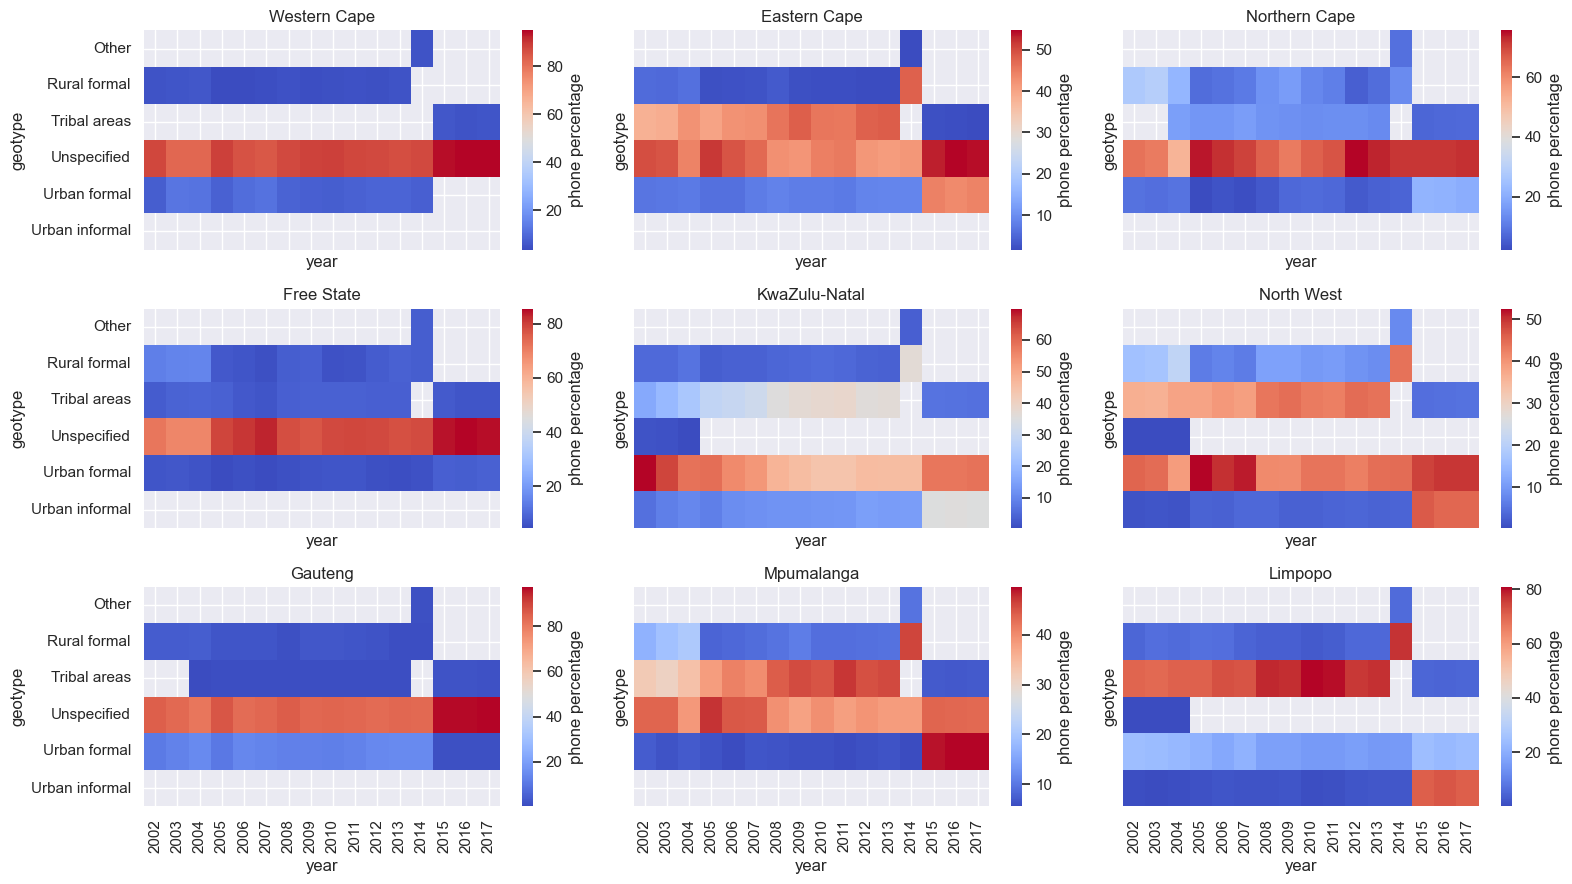

In [21]:
fig, ax = plt.subplots(3, 3, figsize=(16, 9), sharex=True, sharey=True)
axes = ax.flatten()

for prov, axis in zip(df['prov'].unique(), axes):
    df_prov = df_phones[df_phones['prov'] == prov]
    df_list = []

    for year in range(2002, 2018):
        df_year = df_prov[df_prov['year'] == year]
        
        weighted_counts = (
            df_year.groupby(['geotype', 'cell_phone'])['house_wgt'].sum().reset_index(name='weighted_count')
        )
        total_weighted = weighted_counts['weighted_count'].sum()
        weighted_counts['percentage'] = (weighted_counts['weighted_count'] / total_weighted) * 100
        
        weighted_counts['year'] = year
        df_list.append(weighted_counts)
    
    result_df = pd.concat(df_list, ignore_index=True)
    dff = result_df.pivot(index='geotype', columns='year', values='percentage')
    
    sns.heatmap(
        dff,
        cbar_kws={"label": "phone percentage"},
        cmap='coolwarm',
        ax=axis
    )
    axis.set_title(f"{prov}")

plt.tight_layout()
plt.show()


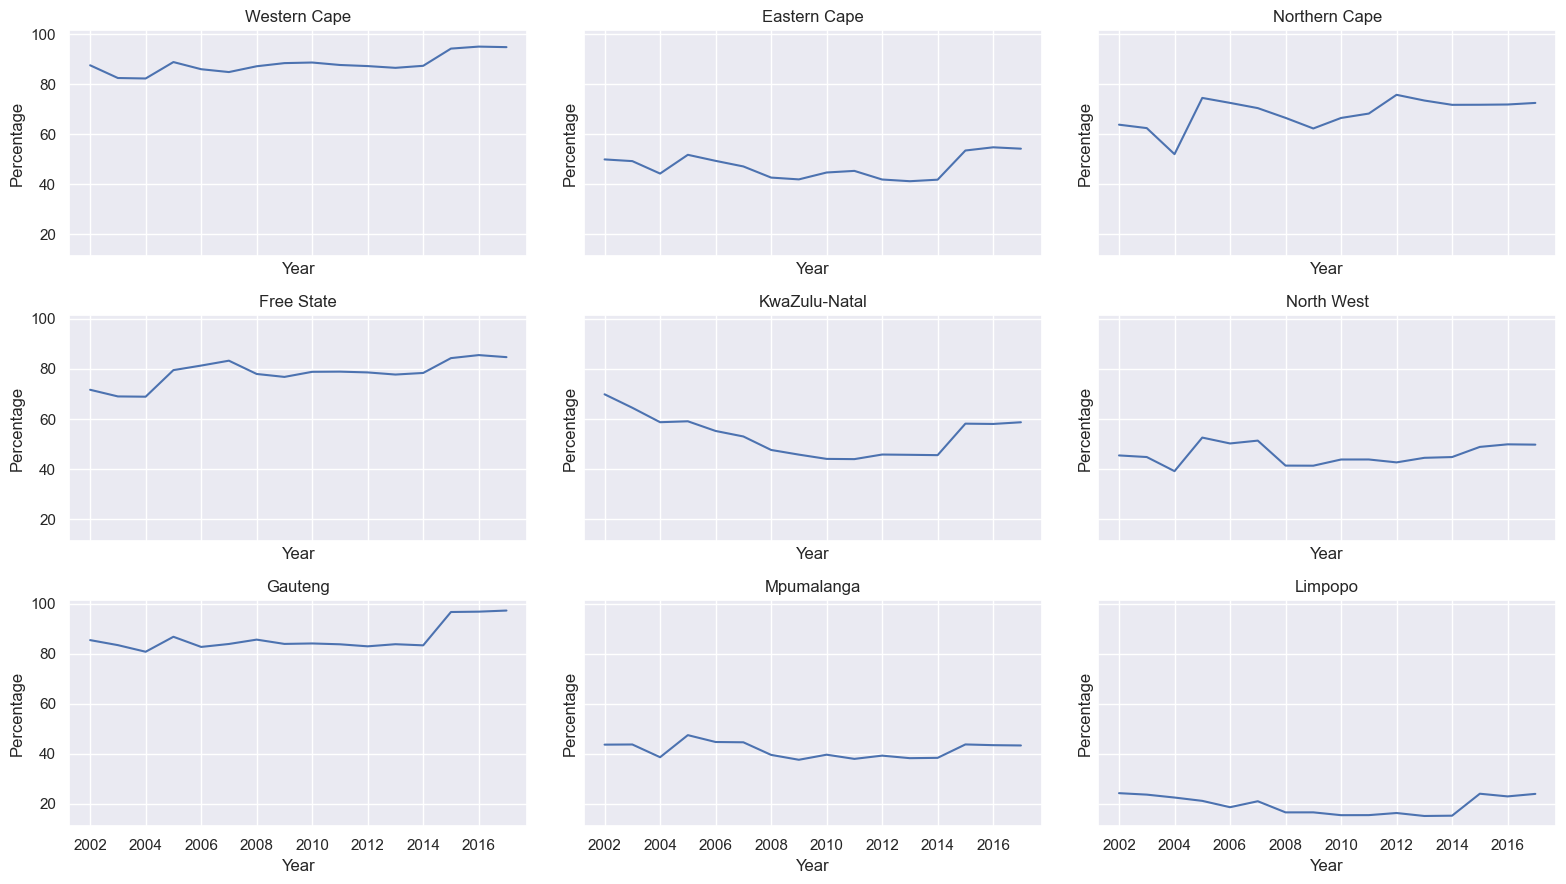

In [23]:
fig, ax = plt.subplots(3, 3, figsize=(16, 9), sharex=True, sharey=True)
axes = ax.flatten()

for prov, axis in zip(df['prov'].unique(), axes):
    df_prov = df_phones[df_phones['prov'] == prov]
    df_list = []

    for year in range(2002, 2018):
        df_year = df_prov[df_prov['year'] == year]
        
        weighted_counts = (
            df_year.groupby(['geotype', 'cell_phone'])['house_wgt'].sum().reset_index(name='weighted_count')
        )
        total_weighted = weighted_counts['weighted_count'].sum()
        weighted_counts['percentage'] = (weighted_counts['weighted_count'] / total_weighted) * 100
        
        weighted_counts['year'] = year
        df_list.append(weighted_counts)
    
    result_df = pd.concat(df_list, ignore_index=True)
    result_df = result_df[result_df['geotype'] == 'Urban formal']

    axis.plot(result_df['year'], result_df['percentage'], label=prov)
    axis.set_title(f"{prov}")
    axis.set_ylabel('Percentage')
    axis.set_xlabel('Year')

plt.tight_layout()
plt.show()


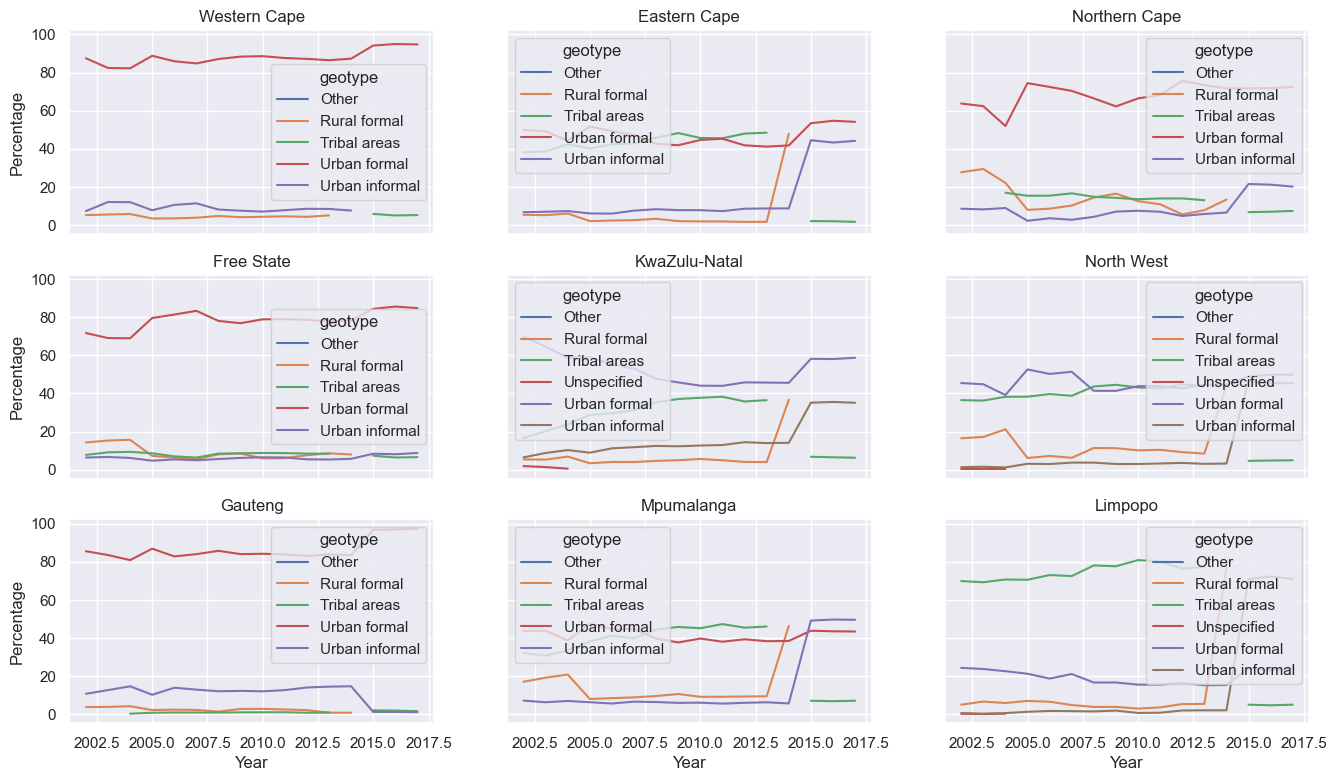

In [24]:

fig, ax = plt.subplots(3, 3, figsize=(16, 9), sharex=True, sharey=True)
axes = ax.flatten()

for prov, axis in zip(df['prov'].unique(), axes):
    df_prov = df_phones[df_phones['prov'] == prov]
    df_list = []

    for year in range(2002, 2018):
        df_year = df_prov[df_prov['year'] == year]
        
        weighted_counts = (
            df_year.groupby(['geotype', 'cell_phone'])['house_wgt'].sum().reset_index(name='weighted_count')
        )
        total_weighted = weighted_counts['weighted_count'].sum()
        weighted_counts['percentage'] = (weighted_counts['weighted_count'] / total_weighted) * 100
        
        weighted_counts['year'] = year
        df_list.append(weighted_counts)
    
    result_df = pd.concat(df_list, ignore_index=True)
    dff = result_df.pivot(index='year', columns='geotype', values='percentage')
    
    dff.plot(ax=axis)
    axis.set_title(f"{prov}")
    axis.set_ylabel('Percentage')
    axis.set_xlabel('Year')




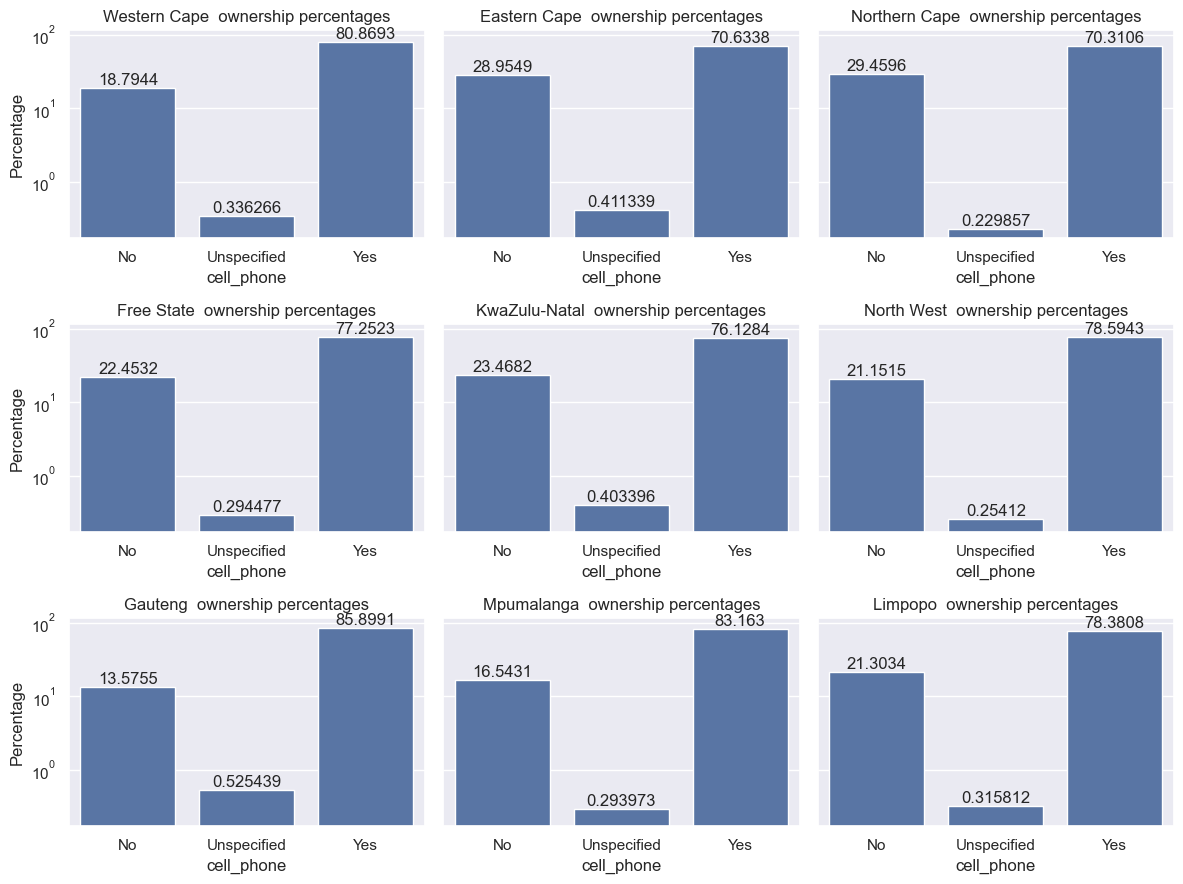

In [25]:
an.plot_phone_ownership(df,'cell_phone','prov','house_wgt','')

#  Exploring the age of people with phones 

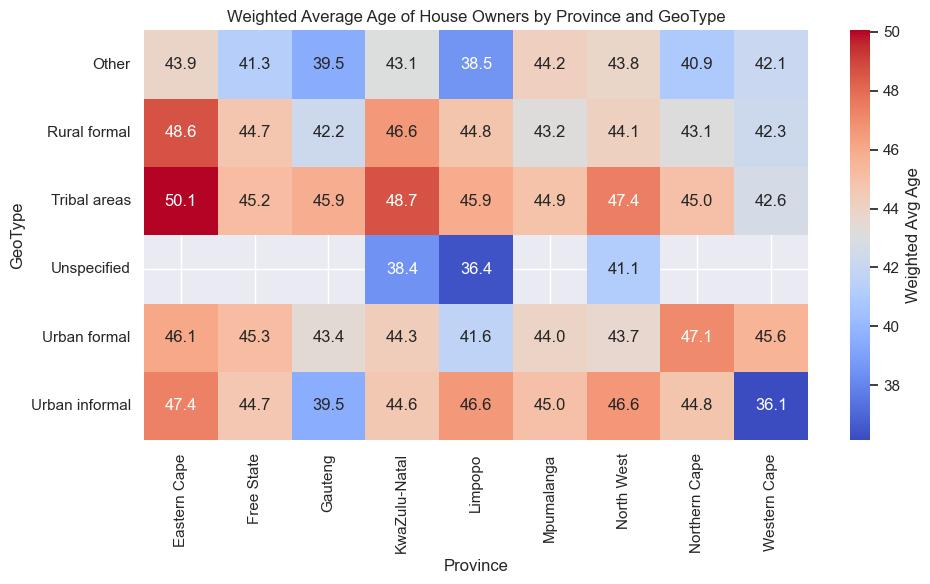

In [26]:


an.plot_weighted_avg_age_heatmap(df_phones,'geotype','head_age','house_wgt','prov')

/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_30923/955850173.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_y.groupby(['prov','geotype'])
/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_30923/955850173.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_y.groupby(['prov','geotype'])
/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_30923/955850173.py:8: Deprecati

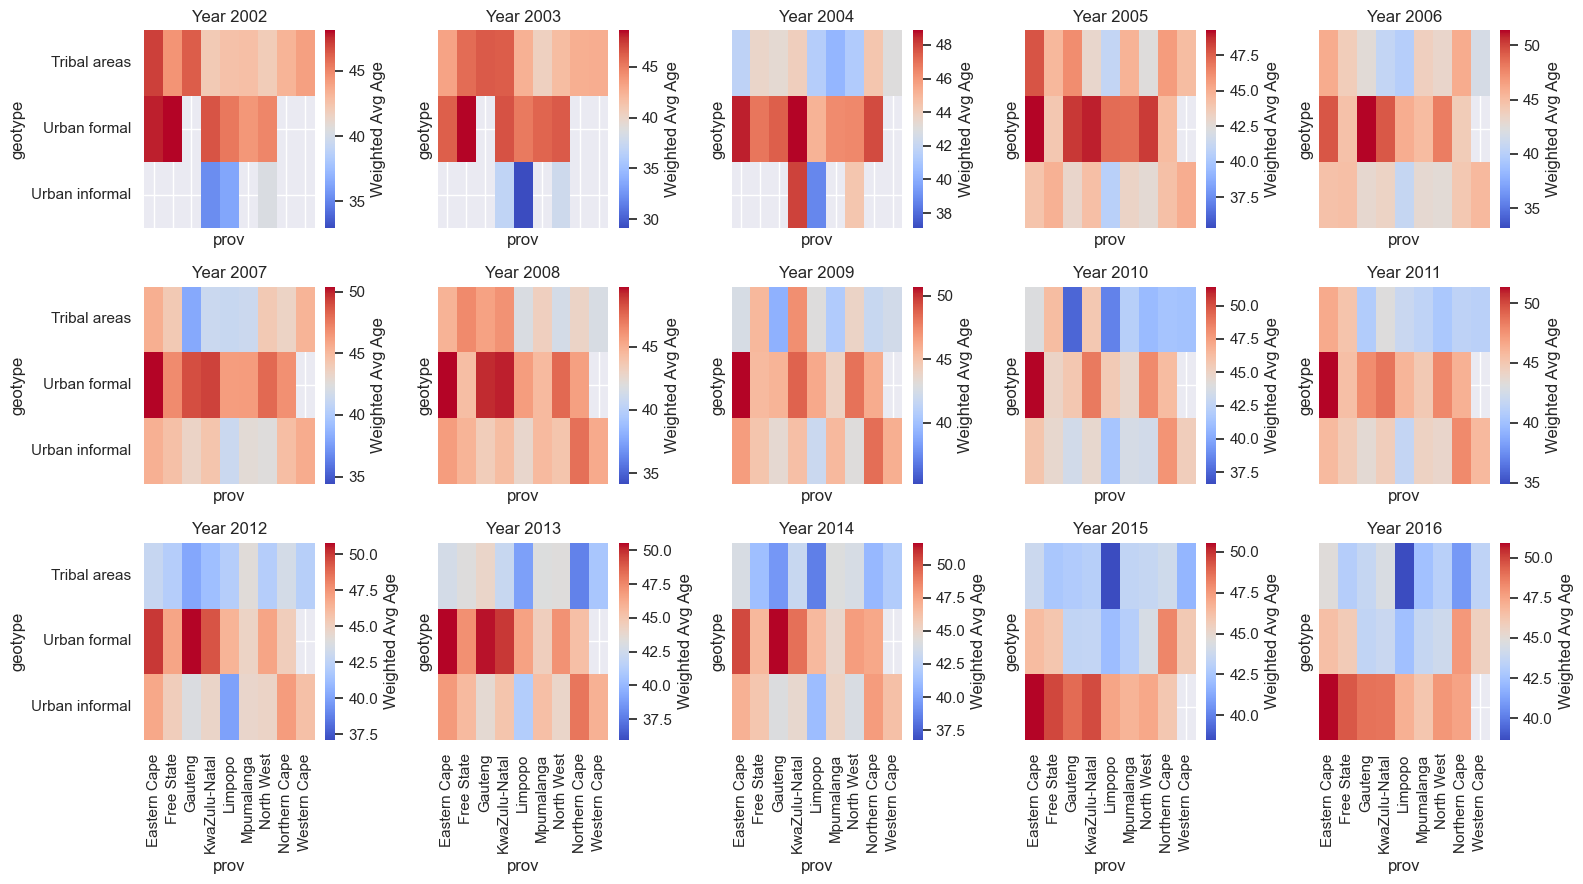

In [27]:
fig, ax = plt.subplots(3, 5, figsize=(16, 9), sharex=True, sharey=True)  
axes = ax.flatten()  

for i, axis in zip(range(2002, 2018), axes):  
    df_y = df_phones[df_phones['year'] == i]
    
    grouped = (
        df_y.groupby(['prov','geotype'])
        .apply(
            lambda x: (x['head_age'] * x['house_wgt']).sum() / x['house_wgt'].sum()
        )
        .reset_index(name="weighted_avg_age")
    )

    heatmap_data = grouped.pivot(
        index='geotype', columns='prov', values="weighted_avg_age"
    )

    sns.heatmap(
        heatmap_data,
        cmap="coolwarm",
        cbar_kws={"label": "Weighted Avg Age"},
        ax=axis
    )
    axis.set_title(f"Year {i}") 


fig.tight_layout() 
plt.show()


/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_30923/3693291192.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_year.groupby(['geotype'])
/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_30923/3693291192.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_year.groupby(['geotype'])
/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_30923/3693291192.py:12: Deprecation

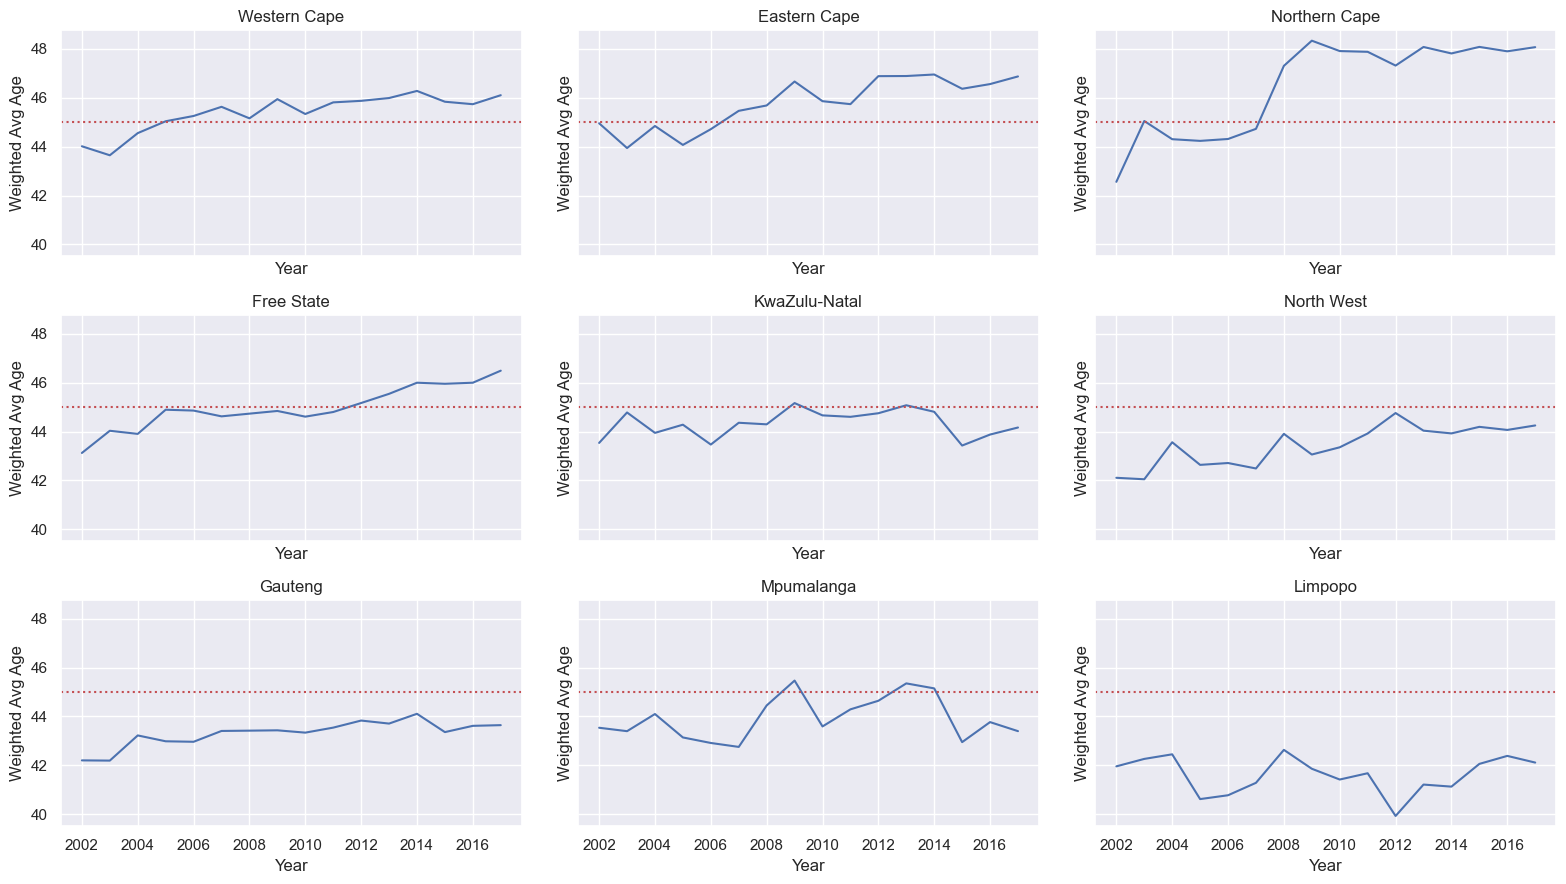

In [28]:

fig, ax = plt.subplots(3, 3, figsize=(16, 9), sharex=True, sharey=True)
axes = ax.flatten()

for prov, axis in zip(df['prov'].unique(), axes):
    df_prov = df_phones[df_phones['prov'] == prov]
    df_list = []

    for year in range(2002, 2018):
        df_year = df_prov[df_prov['year'] == year]
        
        weighted_avg_age = (
            df_year.groupby(['geotype'])
            .apply(
                lambda x: (x['head_age'] * x['house_wgt']).sum() / x['house_wgt'].sum()
            )
            .reset_index(name="weighted_avg_age")
        )
        
        weighted_avg_age['year'] = year
        df_list.append(weighted_avg_age)
    
    result_df = pd.concat(df_list, ignore_index=True)
    result_df = result_df[result_df['geotype'] == 'Urban formal']

    axis.plot(result_df['year'], result_df['weighted_avg_age'], label=prov)
    axis.axhline(y = 45,linestyle = ":",color = 'r')
    axis.set_title(f"{prov}")
    axis.set_ylabel('Weighted Avg Age')
    axis.set_xlabel('Year')

plt.tight_layout()
plt.show()

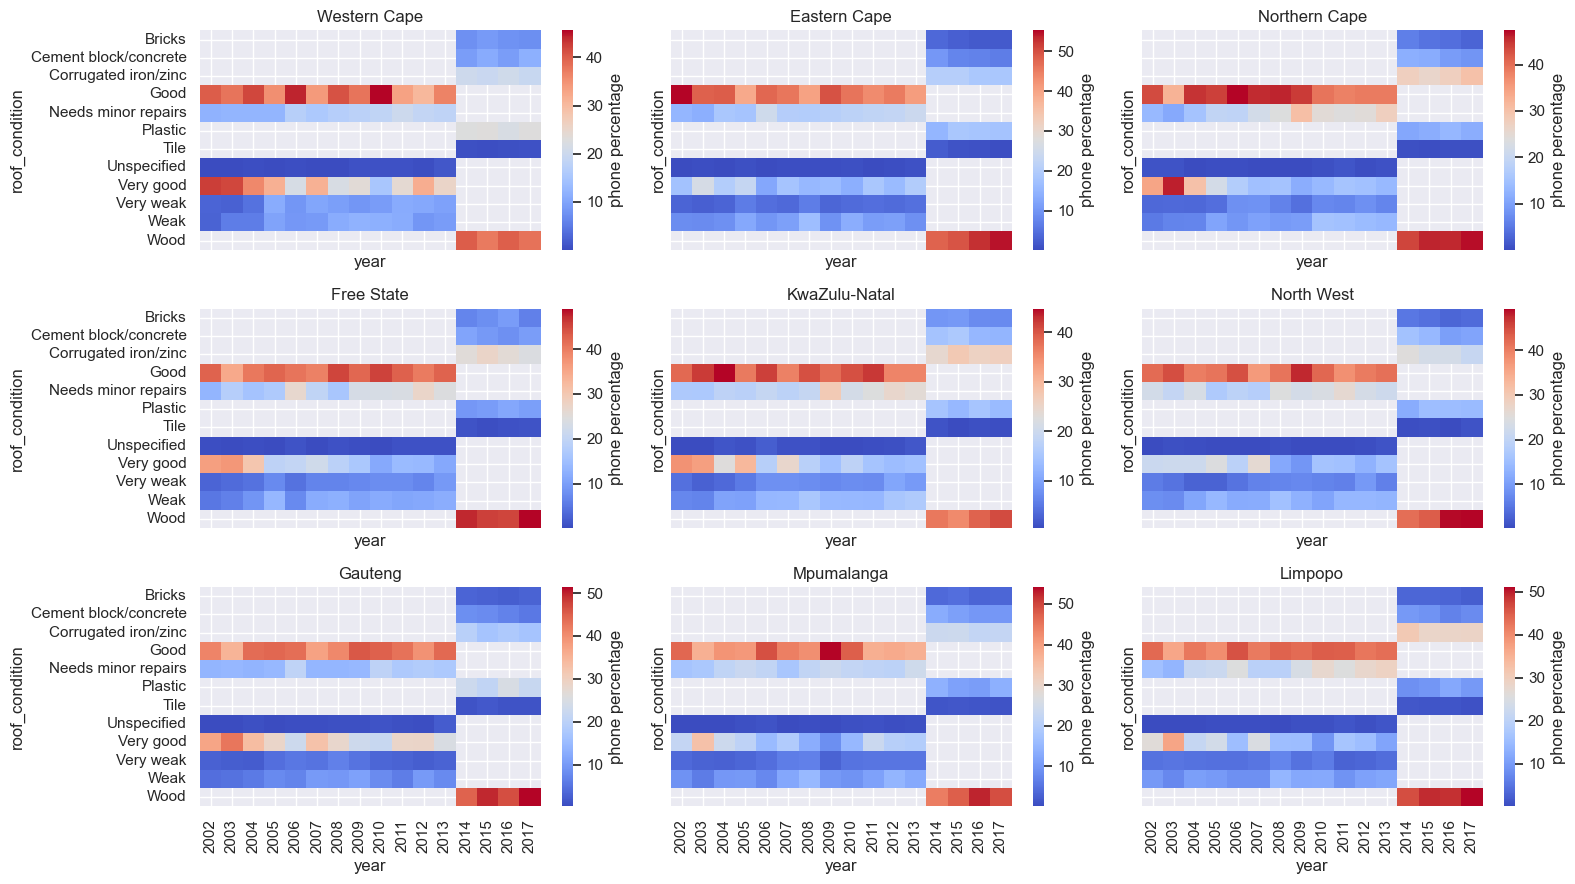

In [29]:
fig, ax = plt.subplots(3, 3, figsize=(16, 9), sharex=True, sharey=True)
axes = ax.flatten()

for prov, axis in zip(df['prov'].unique(), axes):
    df_prov = df_phones[df_phones['prov'] == prov]
    df_list = []

    for year in range(2002, 2018):
        df_year = df_prov[df_prov['year'] == year]
        
        weighted_counts = (
            df_year.groupby(['roof_condition', 'cell_phone'])['house_wgt'].sum().reset_index(name='weighted_count')
        )
        total_weighted = weighted_counts['weighted_count'].sum()
        weighted_counts['percentage'] = (weighted_counts['weighted_count'] / total_weighted) * 100
        
        weighted_counts['year'] = year
        df_list.append(weighted_counts)
    
    result_df = pd.concat(df_list, ignore_index=True)
    dff = result_df.pivot(index='roof_condition', columns='year', values='percentage')
    
    sns.heatmap(
        dff,
        cbar_kws={"label": "phone percentage"},
        cmap='coolwarm',
        ax=axis
    )
    axis.set_title(f"{prov}")

plt.tight_layout()
plt.show()


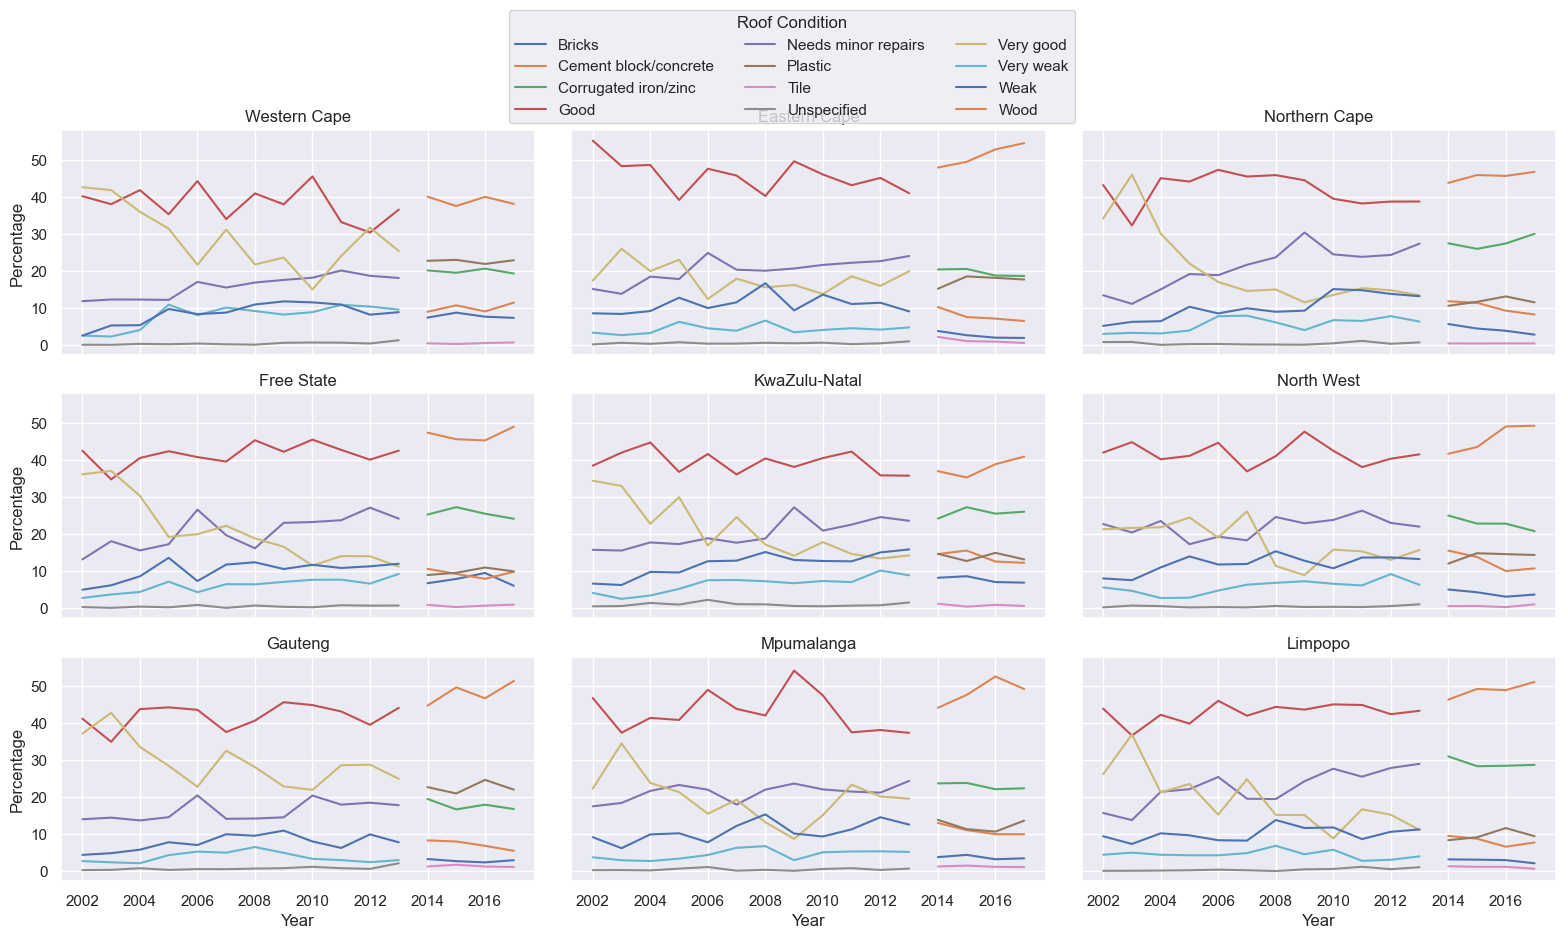

In [30]:
fig, ax = plt.subplots(3, 3, figsize=(16, 9), sharex=True, sharey=True)
axes = ax.flatten()
handles_labels = []

for prov, axis in zip(df['prov'].unique(), axes):
    df_prov = df_phones[df_phones['prov'] == prov]
    df_list = []

    for year in range(2002, 2018):
        df_year = df_prov[df_prov['year'] == year]
        weighted_counts = (
            df_year.groupby(['roof_condition', 'cell_phone'])['house_wgt'].sum().reset_index(name='weighted_count')
        )
        total_weighted = weighted_counts['weighted_count'].sum()
        weighted_counts['percentage'] = (weighted_counts['weighted_count'] / total_weighted) * 100
        weighted_counts['year'] = year
        df_list.append(weighted_counts)
    
    result_df = pd.concat(df_list, ignore_index=True)
    dff = result_df.pivot(index='year', columns='roof_condition', values='percentage')
    lines = dff.plot(ax=axis, legend=False)
    axis.set_title(f"{prov}")
    axis.set_ylabel('Percentage')
    axis.set_xlabel('Year')    
    if not handles_labels:
        handles_labels = lines.get_legend_handles_labels()

fig.legend(
    handles_labels[0], handles_labels[1],
    title='Roof Condition',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=3
)


plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()


## household expenditure

/Users/phulusoravhuhali/Desktop/assigment_capsnap/venv/lib/python3.9/site-packages/seaborn/distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


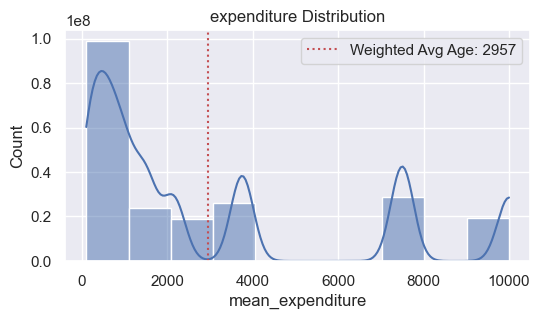

In [31]:

an.plot_age_distribution(df,'mean_expenditure','house_wgt','expenditure')

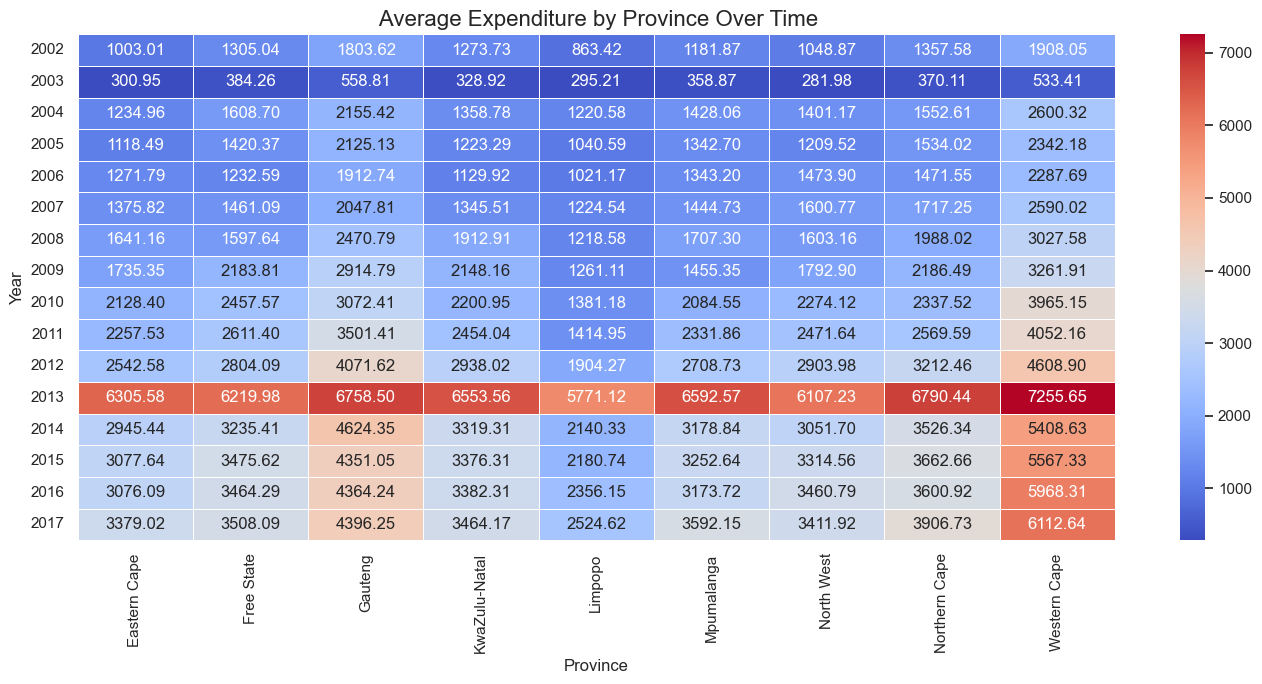

In [32]:

cohort_data = df.groupby(['year', 'prov'])['mean_expenditure'].mean().reset_index()

cohort_table = cohort_data.pivot_table(index='year', columns='prov', values='mean_expenditure')

plt.figure(figsize=(14, 7))  
sns.heatmap(cohort_table, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title(' Average Expenditure by Province Over Time', fontsize=16)
plt.xlabel('Province')
plt.ylabel('Year')
plt.tight_layout()

plt.show()

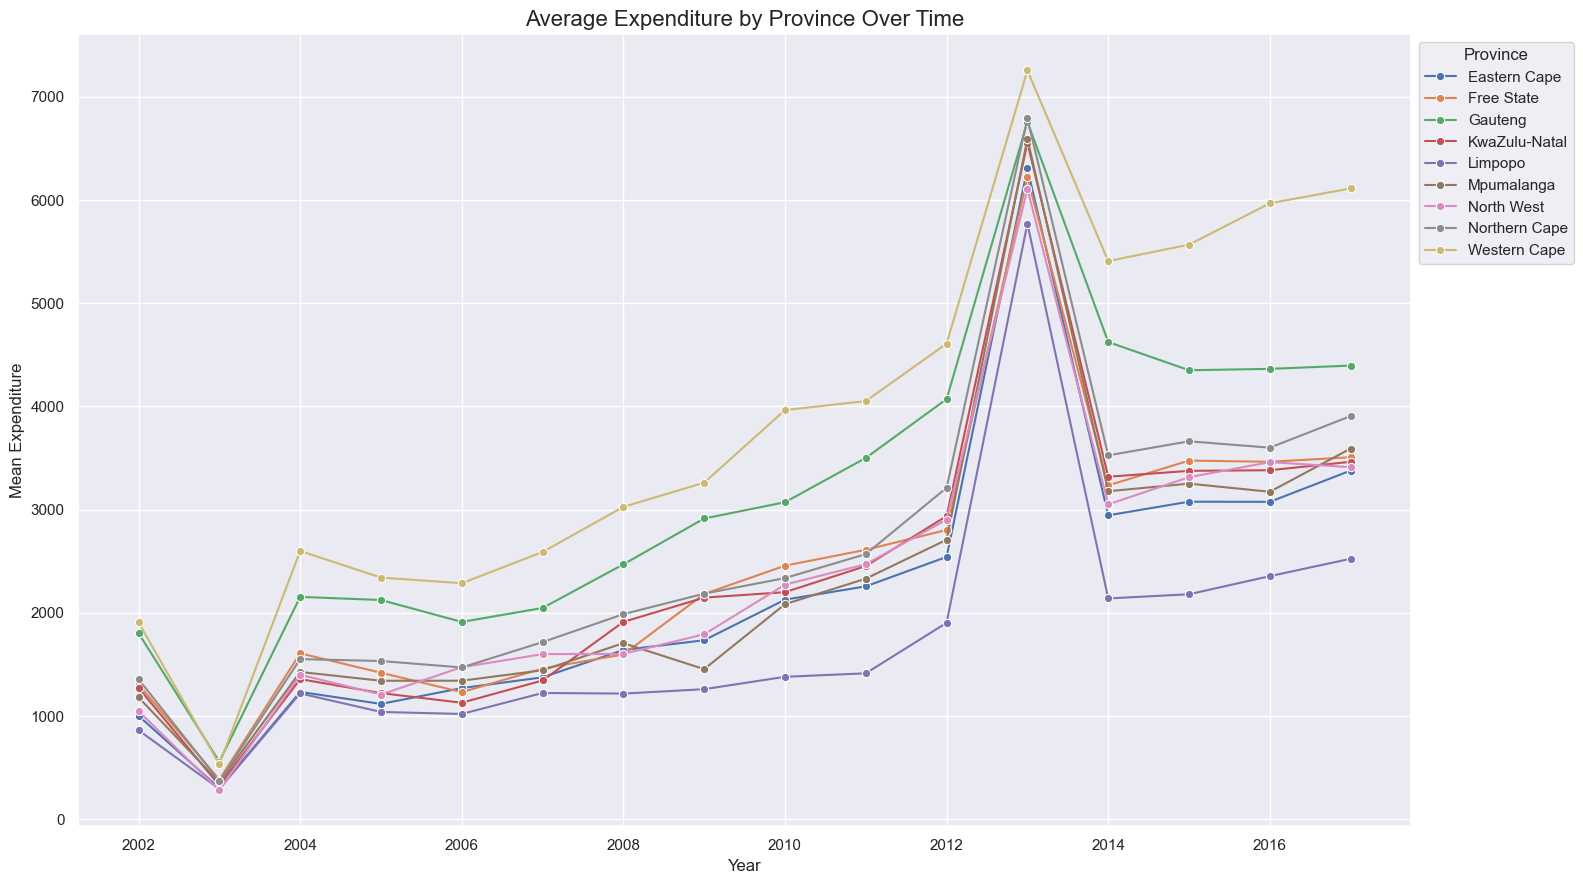

In [33]:
plt.figure(figsize=(16, 9))
sns.lineplot(
    data=cohort_data, 
    x='year', 
    y='mean_expenditure', 
    hue='prov', 
    marker='o')

plt.title('Average Expenditure by Province Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Expenditure', fontsize=12)
plt.legend(title='Province', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

plt.show()

/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_30923/508000993.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_y.groupby(['prov','geotype'])
/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_30923/508000993.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_y.groupby(['prov','geotype'])
/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_30923/508000993.py:8: Deprecati

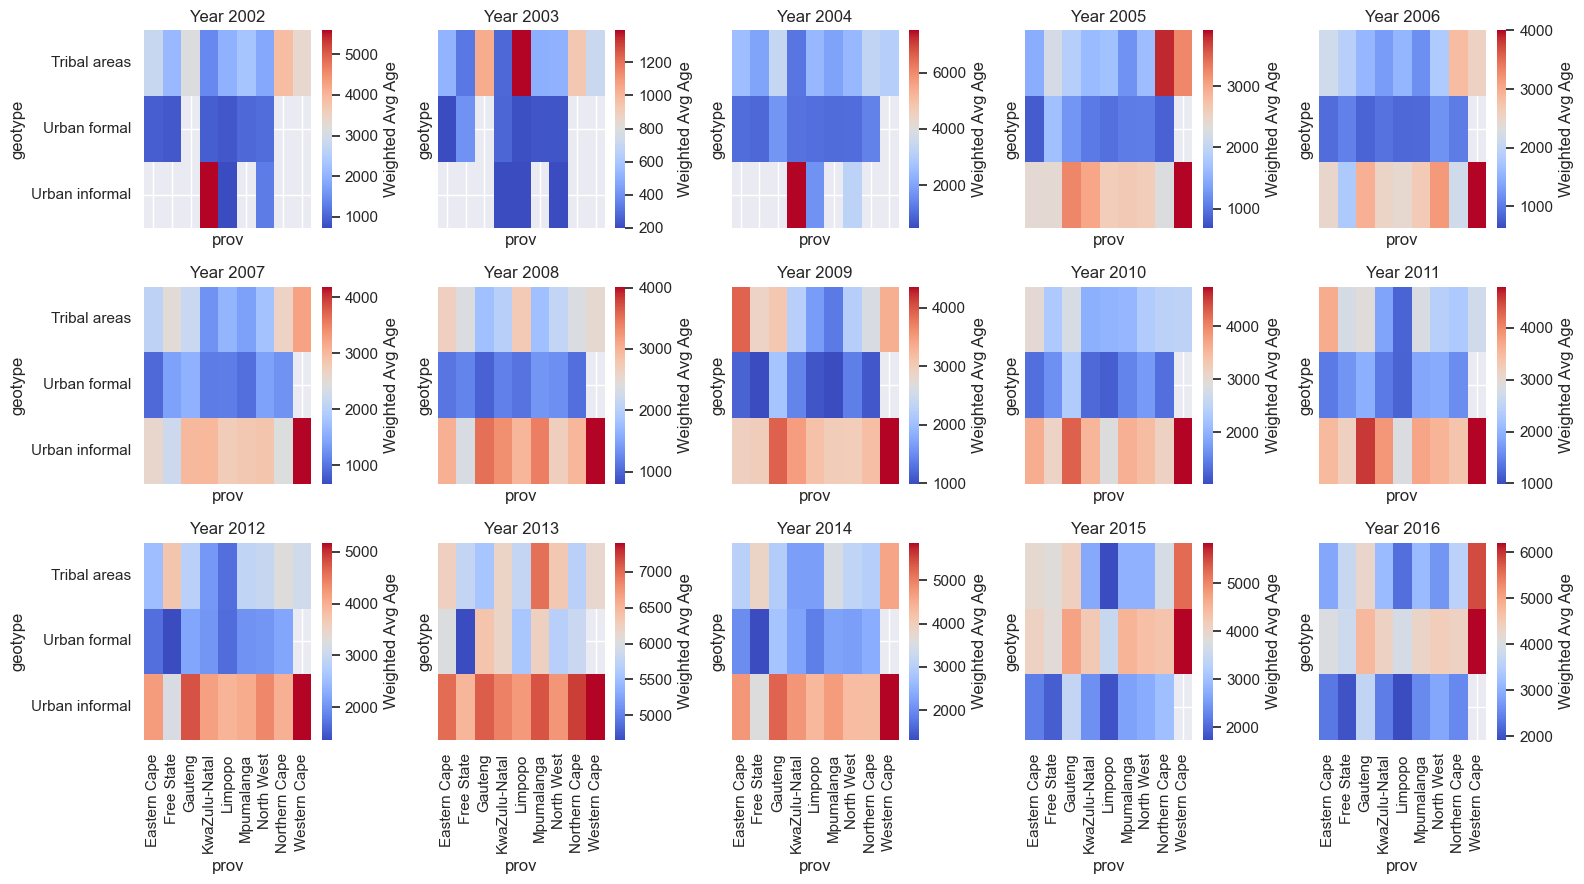

In [34]:
fig, ax = plt.subplots(3, 5, figsize=(16, 9), sharex=True, sharey=True)  
axes = ax.flatten()  

for i, axis in zip(range(2002, 2018), axes):  
    df_y = df_phones[df_phones['year'] == i]
    
    grouped = (
        df_y.groupby(['prov','geotype'])
        .apply(
            lambda x: (x['mean_expenditure'] * x['house_wgt']).sum() / x['house_wgt'].sum()
        )
        .reset_index(name="weighted_avg_age")
    )

    heatmap_data = grouped.pivot(
        index='geotype', columns='prov', values="weighted_avg_age"
    )

    sns.heatmap(
        heatmap_data,
        cmap="coolwarm",
        cbar_kws={"label": "Weighted Avg Age"},
        ax=axis
    )
    axis.set_title(f"Year {i}") 


fig.tight_layout() 
plt.show()


In [61]:
categorical_cols = [x for x in df.columns if type(df[x][1]).__name__ == 'str' and x not in  ['cell_phone','expenditure']]


numerical_cols = [x for x in df.columns if type(df[x][1]).__name__ != 'str' and x != 'uqnr']




In [62]:
X = df.drop(columns=["uqnr", "cell_phone","expenditure"])
y = df["cell_phone"].apply(lambda x: 1 if x == "Yes" else 0)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [64]:
categorical_cols

['electricity', 'roof_condition', 'prov', 'geotype', 'head_popgrp', 'head_sex']

In [39]:
numerical_cols

['head_age', 'house_wgt', 'year', 'mean_expenditure']

In [40]:
categorical_transformer = Pipeline(steps=[

    ("imputer", SimpleImputer(strategy="most_frequent")),

    (" ", OneHotEncoder(handle_unknown="ignore"))

])



numerical_transformer = Pipeline(steps=[

    ("imputer", SimpleImputer(strategy="mean")),

    ("scaler", StandardScaler())

])


In [65]:

preprocessor = ColumnTransformer(transformers=[
("num", numerical_transformer, numerical_cols),

    ("cat", categorical_transformer, categorical_cols)

])


preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['head_age', 'house_wgt', 'year',
                                  'mean_expenditure']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 (' ',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['electricity', 'roof_condition', 'prov',
                                  'geotype', 'head_popgrp', 'head_sex'])])

In [66]:
logistic_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(random_state=42))
])


logist = logistic_pipeline.fit(X_train, y_train)
y_pred = logist.predict(X_test)
print(classification_report(y_test, y_pred, output_dict=True))

{'0': {'precision': 0.6824428690245158, 'recall': 0.5505111821086262, 'f1-score': 0.6094183805195494, 'support': 31300.0}, '1': {'precision': 0.8537753988463337, 'recall': 0.9110731555831596, 'f1-score': 0.8814941597497572, 'support': 90164.0}, 'accuracy': 0.8181601132845946, 'macro avg': {'precision': 0.7681091339354247, 'recall': 0.7307921688458929, 'f1-score': 0.7454562701346533, 'support': 121464.0}, 'weighted avg': {'precision': 0.8096248012748483, 'recall': 0.8181601132845946, 'f1-score': 0.8113830824766104, 'support': 121464.0}}


In [43]:
df['head_popgrp'].unique()

array(['White', 'Coloured', 'Indian/Asian', 'African/Black'], dtype=object)

In [44]:
new_data = {
    'electricity': ['No'],  
    'roof_condition': ['Needs minor repairs'],  
    'head_age': [60], 
    'house_wgt': [300], 
    'prov': ['Limpopo'],  
    'geotype': ['Rural formal'],  
    'head_popgrp': ['Coloured'], 
    'head_sex': ['Male'],  
    'year': [2007], 
    'mean_expenditure': [100] }

new_person_df = pd.DataFrame(new_data)

new_prediction = logistic_pipeline.predict(new_person_df)

if new_prediction[0] == 1:
    print("The person owns a cell phone.")
else:
    print("The person does not own a cell phone.")


The person does not own a cell phone.


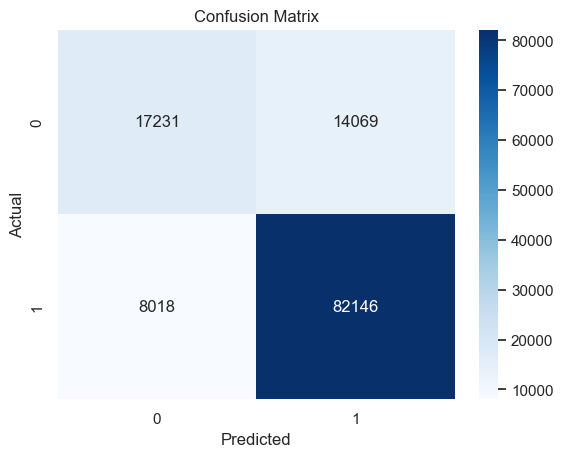

In [45]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [46]:

decision_tree_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])


decision = decision_tree_pipeline.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)
print(classification_report(y_test, y_pred_dec, output_dict=True))

{'0': {'precision': 0.5241942973901736, 'recall': 0.5409584664536741, 'f1-score': 0.5324444584204651, 'support': 31300.0}, '1': {'precision': 0.8388569249576618, 'recall': 0.8295439421498603, 'f1-score': 0.8341744411047973, 'support': 90164.0}, 'accuracy': 0.7551784890996509, 'macro avg': {'precision': 0.6815256111739177, 'recall': 0.6852512043017671, 'f1-score': 0.6833094497626312, 'support': 121464.0}, 'weighted avg': {'precision': 0.757771663128129, 'recall': 0.7551784890996509, 'f1-score': 0.7564217863427313, 'support': 121464.0}}


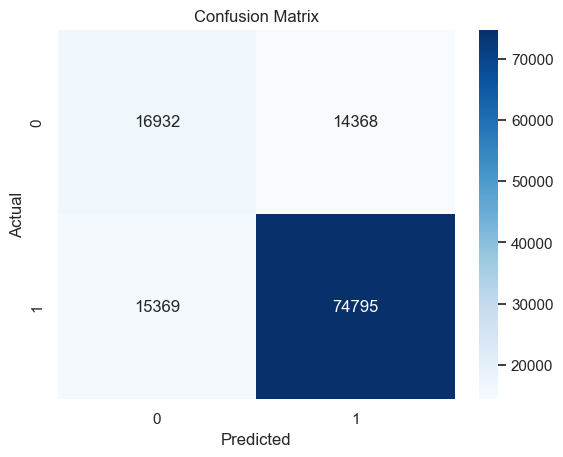

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred_dec)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


R forest 

In [69]:

randomforest_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestRegressor(random_state=42))
])

In [71]:
# from sklearn.metrics import mean_absolute_error
# forests = randomforest_pipeline.fit(X_train, y_train)
# y_pred_dec = forests.predict(X_test)


In [ ]:
mae = mean_absolute_error(y_test, y_pred_dec)
print(f"Mean Absolute Error: {mae}")


In [48]:
# new_data = {
#     'electricity': ['No'],  
#     'roof_condition': ['Needs minor repairs'],  
#     'head_age': [60], 
#     'house_wgt': [300], 
#     'prov': ['Limpopo'],  
#     'geotype': ['Rural formal'],  
#     'head_popgrp': ['Coloured'], 
#     'head_sex': ['Male'],  
#     'year': [2007], 
#     'mean_expenditure': [100] }

# new_person_df = pd.DataFrame(new_data)

# new_prediction = decision.predict(new_person_df)

# if new_prediction[0] == 1:
#     print("The person owns a cell phone.")
# else:
#     print("The person does not own a cell phone.")


## Predict the age 

In [49]:
X = df_phones.drop(columns=["uqnr", "cell_phone", "expenditure"])
y = df_phones["head_age"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [50]:
regression = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())])
regg = regression.fit(X_train, y_train)
y_pred_dec = regg.predict(X_test)


In [51]:

mse = mean_squared_error(y_test, y_pred_dec)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3.0551568366053186e-09
